### which ML models are  sensitive to outliers?
 1. Naivye bayes classifiers----------------------not Sensitive 
 2. SVM-------------------------------------------not Sensitive
 
 3.LInear Reggresion------------------------------Sensitive
 
 4.Logistic Reggresion----------------------------Sensitive 
 
 5.Decision Tree Regressor or Classifier----------not Sensitive
 
 6.Ensemble (Random Forest)-----------------------not Sensitive
 
 7.KNN--------------------------------------------not Sensitive
 
 8.Kmeans-----------------------------------------Sensitive
 

 9.Hierchical Clustering -------------------------Sensitive
 
10.PCA--------------------------------------------Sensitive

11.Nerual Networks--------------------------------Sensitive

In [73]:
import pandas as pd
import os
os.chdir("D:\data")

In [74]:
df=pd.read_csv("train.csv")

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df["Age"].isnull().sum()

177

In [77]:
import seaborn as sns

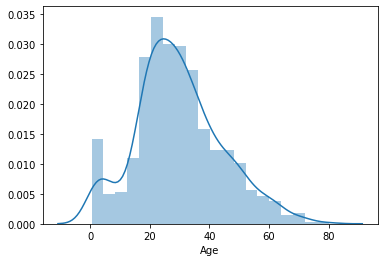

In [78]:
sns.distplot(df["Age"].dropna())

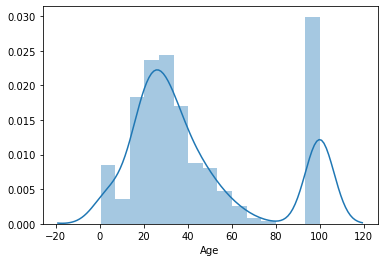

In [79]:
### creating outliers
sns.distplot(df["Age"].fillna(100))

### if the data is Gaussian Distributed then use only upper boundary and lower boundary by 3*std 

Text(0, 0.5, 'No of passengers')

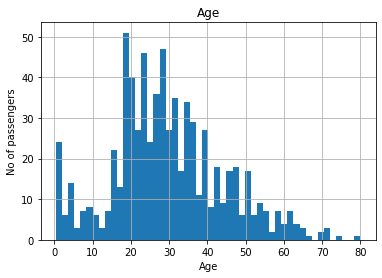

In [80]:
fig=df["Age"].hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No of passengers")

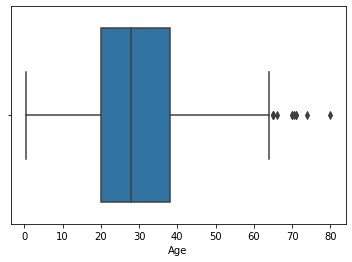

In [81]:
sns.boxplot(df["Age"])

In [82]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
### Assuming Age follows Gaussian Distribution we will calculate the boundary which diffrentiate the outliers

upper_boundary=df["Age"].mean()+3*df["Age"].std()
lower_boundary=df["Age"].mean()-3*df["Age"].std()
print(upper_boundary)
print(lower_boundary)
print(df["Age"].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [84]:
df["Age"][df["Age"]>73]=73

C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


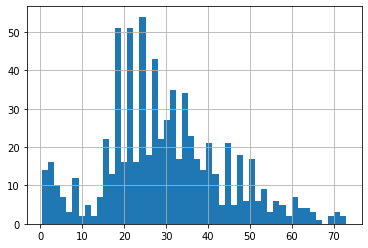

In [99]:
df["Age"].hist(bins=50)

In [30]:
### lets compute the  IOR to calcute the  boundary 
IOR = 38- 20.125
IOR


17.875

In [31]:
max_point=(38+(1.5*(38-20.125)))
max_point

64.8125

In [34]:
min_point=(20.125-(1.5*(38-20.125)))
min_point

-6.6875

In [32]:
df["Age"][df["Age"]>max_point]=max_point

C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


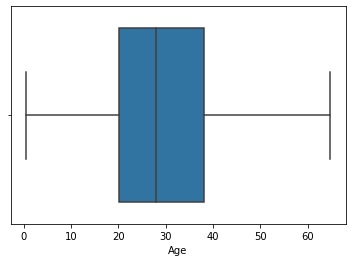

In [33]:
sns.boxplot(df["Age"])

### if the  data is skewed  then use IOR techique 

Text(0, 0.5, 'No.of passenger')

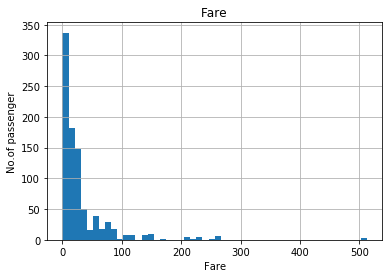

In [92]:
fare_fig=df["Fare"].hist(bins=50)
fare_fig.set_title("Fare")
fare_fig.set_xlabel("Fare")
fare_fig.set_ylabel("No.of passenger")

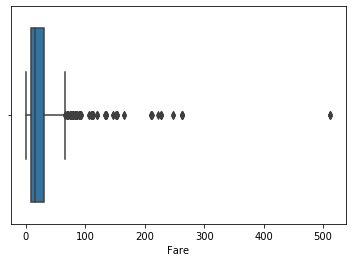

In [93]:
sns.boxplot(df["Fare"])

In [94]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### for extreme outliers we have to take 3 or else 1.5

In [95]:
max_point_1=(31+(3*(31-7.910)))
max_point_1

100.27

In [96]:
min_point_1=(7.910-(3*(31-7.910)))
min_point_1

-61.36

In [97]:
df["Fare"][df['Fare']>max_point_1]=max_point_1

C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


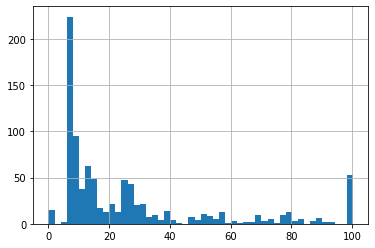

In [98]:
df["Fare"].hist(bins=50)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[["Age","Fare"]].fillna(0),df["Survived"],test_size=0.3)

In [102]:
### logistic regg 
from sklearn.linear_model import LogisticRegression


In [110]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred)) )
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])) )

Accuracy_Score: 0.6716417910447762
roc_auc_score: 0.672763134301596


C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred)) )
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])) )


Accuracy_Score: 0.6977611940298507
roc_auc_score: 0.6896778435239974


C:\Users\Abhisek Datta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
